<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [1]:
#make sure you are loading atleast 50k datapoints
#you can work with features of preprocessed_data.csv for the assignment.
# If you want to add more features, you can add. (This is purely optional, not mandatory)


import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer

from scipy.sparse import hstack

from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import GridSearchCV


from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('preprocessed_data.csv')
data.sample(5)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
30401,tx,mrs,grades_3_5,0,1,literacy_language,esl literacy,my kiddos great i work title 1 school large pe...,634.11
87462,ga,mrs,grades_9_12,7,0,specialneeds,specialneeds,i work african american latino 11th 12th grade...,1043.50
46402,hi,mrs,grades_6_8,0,1,math_science,environmentalscience mathematics,ilima intermediate located ewa beach o ahu haw...,279.48
27349,fl,mrs,grades_3_5,0,1,health_sports,health_wellness nutritioneducation,i teach amazing group gifted talented 4th grad...,225.00
93938,ny,ms,grades_6_8,0,1,literacy_language,literacy literature_writing,are great divide readers i 6th graders high ac...,247.02


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 9 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   school_state                                  109248 non-null  object 
 1   teacher_prefix                                109248 non-null  object 
 2   project_grade_category                        109248 non-null  object 
 3   teacher_number_of_previously_posted_projects  109248 non-null  int64  
 4   project_is_approved                           109248 non-null  int64  
 5   clean_categories                              109248 non-null  object 
 6   clean_subcategories                           109248 non-null  object 
 7   essay                                         109248 non-null  object 
 8   price                                         109248 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [4]:
def per_data(a,b):
    return (a * 100 )/b 

In [5]:
x = data.drop(['project_is_approved'], axis=1)
y = data['project_is_approved'].values



In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y)

print(f"{x_train.shape} --- {x_test.shape} --- {y_train.shape} --- {y_test.shape}")

(73196, 8) --- (36052, 8) --- (73196,) --- (36052,)


In [7]:
features_bow = []
features_tfidf = []

# BOW transformation 

In [8]:
bow_model = CountVectorizer(min_df=10, ngram_range=(1,4), max_features=15000)


In [9]:
bow_model.fit(x_train['essay'])

CountVectorizer(max_features=15000, min_df=10, ngram_range=(1, 4))

In [10]:
bow_model.vocabulary_

{'the': 13019,
 'student': 11625,
 'body': 1343,
 'represents': 10195,
 'rich': 10302,
 'cultural': 2738,
 'mix': 7788,
 'students': 11666,
 'it': 6087,
 'racially': 9811,
 'diverse': 3199,
 'racial': 9810,
 'ethnic': 3843,
 'groups': 5124,
 'represented': 10193,
 'including': 5811,
 'hispanic': 5532,
 '12': 25,
 'african': 502,
 'american': 713,
 '60': 136,
 'totally': 13703,
 'economically': 3439,
 'disadvantaged': 3141,
 'due': 3330,
 'nearby': 8194,
 'military': 7748,
 'base': 1083,
 'population': 9324,
 'heavy': 5315,
 'influence': 5904,
 'once': 8695,
 'always': 674,
 'graduated': 5021,
 'particular': 9061,
 'high': 5472,
 'school': 10433,
 '20': 46,
 'years': 14940,
 'ago': 516,
 'important': 5746,
 'give': 4837,
 'back': 1022,
 'community': 2384,
 'live': 7002,
 'lived': 7016,
 'needed': 8302,
 'lab': 6308,
 'equipment': 3804,
 'learning': 6595,
 'not': 8475,
 'must': 7961,
 'talk': 12769,
 'write': 14856,
 'relate': 10145,
 'past': 9079,
 'experiences': 4045,
 'apply': 778,
 '

In [11]:
len(bow_model.vocabulary_)

15000

In [12]:
bow_vec_train = bow_model.transform(x_train['essay'])
bow_vec_test = bow_model.transform(x_test['essay'])


In [13]:
bow_vec_train.shape

(73196, 15000)

In [14]:
bow_vec_test.shape

(36052, 15000)

In [15]:
for i in bow_model.get_feature_names_out():
    
    features_bow.append(i)
    

# tf-idf vectorizer

In [16]:
tf_idf_model = TfidfVectorizer(min_df = 10, ngram_range=(1,4), max_features=15000)

In [17]:
tf_idf_model.fit(x_train['essay'])

TfidfVectorizer(max_features=15000, min_df=10, ngram_range=(1, 4))

In [18]:
tf_idf_vec_train = tf_idf_model.transform(x_train['essay'])
tf_idf_vec_test = tf_idf_model.transform(x_test['essay'])


In [19]:
tf_idf_vec_train.shape

(73196, 15000)

In [20]:
tf_idf_vec_test.shape

(36052, 15000)

In [21]:
for i in tf_idf_model.get_feature_names_out():
    features_tfidf.append(i)
    
    

In [22]:
features_tfidf[:5]

['00', '000', '000 students', '10', '10 students']

In [23]:
for i in range(15000):
    
    if features_bow[i] != features_tfidf[i]:
        print(features_bow[i], features_tfidf[i])
        break

# One hot encoding on categorical feature

<dt>categorical features</dt>
<dd> - teacher_prefix</dd>
<dd> - project_grade_category</dd>
<dd> - school_state</dd>
<dd> - clean_categories</dd>
<dd> - clean_subcategories</dd>

## teacher_prefix one hot encoding

In [24]:
enc = OneHotEncoder(handle_unknown='ignore')

In [25]:
enc.fit(x_train['teacher_prefix'].to_numpy().reshape(-1, 1))
enc.get_feature_names_out()

array(['x0_dr', 'x0_mr', 'x0_mrs', 'x0_ms', 'x0_teacher'], dtype=object)

In [26]:
teacher_prefix_train_ohc = enc.transform(x_train['teacher_prefix'].to_numpy().reshape(-1, 1))
teacher_prefix_test_ohc = enc.transform(x_test['teacher_prefix'].to_numpy().reshape(-1, 1))


In [27]:
print(teacher_prefix_train_ohc.shape)

(73196, 5)


In [28]:
teacher_prefix_test_ohc.shape

(36052, 5)

In [29]:
for i in enc.get_feature_names_out():
    features_bow.append(i)
    features_tfidf.append(i)

## project_grade_category one hot encoding

In [30]:
enc.fit(x_train['project_grade_category'].to_numpy().reshape(-1,1))
enc.get_feature_names_out()

array(['x0_grades_3_5', 'x0_grades_6_8', 'x0_grades_9_12',
       'x0_grades_prek_2'], dtype=object)

In [31]:
project_grade_train_ohc = enc.transform(x_train['project_grade_category'].to_numpy().reshape(-1, 1))
project_grade_test_ohc = enc.transform(x_test['project_grade_category'].to_numpy().reshape(-1, 1))


In [32]:
project_grade_train_ohc.shape

(73196, 4)

In [33]:
project_grade_test_ohc.shape

(36052, 4)

In [34]:
for i in enc.get_feature_names_out():
    
    features_bow.append(i)
    features_tfidf.append(i)

## school_state one hot encoding

In [35]:
enc.fit(x_train['school_state'].to_numpy().reshape(-1,1))
enc.get_feature_names_out()

array(['x0_ak', 'x0_al', 'x0_ar', 'x0_az', 'x0_ca', 'x0_co', 'x0_ct',
       'x0_dc', 'x0_de', 'x0_fl', 'x0_ga', 'x0_hi', 'x0_ia', 'x0_id',
       'x0_il', 'x0_in', 'x0_ks', 'x0_ky', 'x0_la', 'x0_ma', 'x0_md',
       'x0_me', 'x0_mi', 'x0_mn', 'x0_mo', 'x0_ms', 'x0_mt', 'x0_nc',
       'x0_nd', 'x0_ne', 'x0_nh', 'x0_nj', 'x0_nm', 'x0_nv', 'x0_ny',
       'x0_oh', 'x0_ok', 'x0_or', 'x0_pa', 'x0_ri', 'x0_sc', 'x0_sd',
       'x0_tn', 'x0_tx', 'x0_ut', 'x0_va', 'x0_vt', 'x0_wa', 'x0_wi',
       'x0_wv', 'x0_wy'], dtype=object)

In [36]:
school_state_train_ohc = enc.transform(x_train['school_state'].to_numpy().reshape(-1, 1))
school_state_test_ohc = enc.transform(x_test['school_state'].to_numpy().reshape(-1, 1))


In [37]:
school_state_train_ohc.shape

(73196, 51)

In [38]:
school_state_test_ohc.shape

(36052, 51)

In [39]:
for i in enc.get_feature_names_out():
    
    features_bow.append(i)
    features_tfidf.append(i)

## clean_categories one hot encoding

In [40]:
bow_model = CountVectorizer()
bow_model.fit(x_train['clean_categories'])
bow_model.vocabulary_

{'math_science': 5,
 'literacy_language': 4,
 'health_sports': 2,
 'music_arts': 6,
 'specialneeds': 7,
 'history_civics': 3,
 'appliedlearning': 0,
 'warmth': 8,
 'care_hunger': 1}

In [41]:
clean_categories_train_ohc = bow_model.transform(x_train['clean_categories'])
clean_categories_test_ohc = bow_model.transform(x_test['clean_categories'])


In [42]:
clean_categories_train_ohc.shape

(73196, 9)

In [43]:
clean_categories_test_ohc.shape

(36052, 9)

In [44]:
for i in bow_model.get_feature_names_out():
    
    features_bow.append(i)
    features_tfidf.append(i)

## clean_sub_categories one hot encoding

In [45]:
bow_model.fit(x_train['clean_subcategories'])
bow_model.vocabulary_

{'appliedsciences': 0,
 'literacy': 17,
 'health_wellness': 15,
 'nutritioneducation': 21,
 'mathematics': 19,
 'performingarts': 24,
 'literature_writing': 18,
 'visualarts': 28,
 'specialneeds': 26,
 'foreignlanguages': 12,
 'financialliteracy': 11,
 'esl': 9,
 'history_geography': 16,
 'socialsciences': 25,
 'gym_fitness': 13,
 'teamsports': 27,
 'charactereducation': 2,
 'earlydevelopment': 6,
 'music': 20,
 'health_lifescience': 14,
 'other': 22,
 'warmth': 29,
 'care_hunger': 1,
 'civics_government': 3,
 'environmentalscience': 8,
 'extracurricular': 10,
 'college_careerprep': 4,
 'communityservice': 5,
 'parentinvolvement': 23,
 'economics': 7}

In [46]:
clean_subcategories_train_ohc = bow_model.transform(x_train['clean_subcategories'])
clean_subcategories_test_ohc = bow_model.transform(x_test['clean_subcategories'])


In [47]:
clean_subcategories_train_ohc.shape

(73196, 30)

In [48]:
clean_subcategories_test_ohc.shape

(36052, 30)

In [49]:
for i in bow_model.get_feature_names_out():
    
    features_bow.append(i)
    features_tfidf.append(i)

# handling numerical feature

## Normalizing price feature

In [50]:
norm = Normalizer()

In [51]:
price_norm_train = norm.fit_transform(x_train['price'].to_numpy().reshape(1,-1)).reshape(-1,1)
price_norm_test = norm.fit_transform(x_test['price'].to_numpy().reshape(1,-1)).reshape(-1,1)


In [52]:
price_norm_train

array([[0.00062935],
       [0.0016022 ],
       [0.00400259],
       ...,
       [0.00050118],
       [0.00118794],
       [0.00137144]])

## Normalizing teacher_number_of_previously_posted_projects

In [53]:
prev_posted_project_norm_train = norm.fit_transform(x_train['teacher_number_of_previously_posted_projects'].to_numpy().reshape(1,-1)).reshape(-1,1)
prev_posted_project_norm_test = norm.fit_transform(x_test['teacher_number_of_previously_posted_projects'].to_numpy().reshape(1,-1)).reshape(-1,1)




# Stacking all features

## stacking all features with essay bow

In [54]:
bow_set_feature_train = hstack((bow_vec_train, teacher_prefix_train_ohc, project_grade_train_ohc, 
                                school_state_train_ohc, clean_categories_train_ohc,
                               clean_subcategories_train_ohc, price_norm_train, prev_posted_project_norm_train)).tocsr()

bow_set_feature_test = hstack((bow_vec_test, teacher_prefix_test_ohc, project_grade_test_ohc, 
                              school_state_test_ohc, clean_categories_test_ohc, 
                              clean_subcategories_test_ohc, price_norm_test, prev_posted_project_norm_test)).tocsr()



In [55]:
bow_set_feature_train.shape

(73196, 15101)

In [56]:
bow_set_feature_train.shape

(73196, 15101)

### saving all stacked Bag of words features in pickle file so we can use it later

In [57]:
import pickle

file = 'bow_feature_train_5000_features.pkl'

fileObj = open(file, 'wb')

pickle.dump(bow_set_feature_train, fileObj)
fileObj.close()


In [58]:
file = 'bow_feature_test_5000_features.pkl'

fileObj = open(file, 'wb')

pickle.dump(bow_set_feature_test, fileObj)
fileObj.close()


## stacking all features with essay tf-idf

In [59]:
tf_idf_Set_feature_train = hstack((tf_idf_vec_train, teacher_prefix_train_ohc, project_grade_train_ohc, 
                                school_state_train_ohc, clean_categories_train_ohc,
                               clean_subcategories_train_ohc, price_norm_train, prev_posted_project_norm_train)).tocsr()


tf_idf_set_feature_test = hstack((tf_idf_vec_test, teacher_prefix_test_ohc, project_grade_test_ohc, 
                              school_state_test_ohc, clean_categories_test_ohc, 
                              clean_subcategories_test_ohc, price_norm_test, prev_posted_project_norm_test)).tocsr()



In [60]:
tf_idf_Set_feature_train.shape

(73196, 15101)

In [61]:
tf_idf_set_feature_test.shape

(36052, 15101)

### saving all stacked Bag of words features in pickle file so we can use it later


In [62]:

# saving tfidf train stacked features
file = 'tfidf_feature_train_5000_features.pkl'

fileObj = open(file, 'wb')

pickle.dump(bow_set_feature_train, fileObj)
fileObj.close()


In [63]:
# saving tfidf test stacked features

file = 'tfidf_feature_test_5000_features.pkl'

fileObj = open(file, 'wb')

pickle.dump(bow_set_feature_train, fileObj)
fileObj.close()

# model Building (BOW)--- Hyperparameter tunning using GridSearchCV

In [64]:
model = MultinomialNB(class_prior=[0.5,0.5])

In [65]:
alpha_val = {'alpha': [10**i for i in range(-3, 5)]}
alpha_val

{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

In [66]:
clf = GridSearchCV(estimator=model, param_grid=alpha_val, scoring='roc_auc', return_train_score=True, verbose=True, cv=5, n_jobs=-1)

In [67]:
clf.fit(bow_set_feature_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=MultinomialNB(class_prior=[0.5, 0.5]), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
             return_train_score=True, scoring='roc_auc', verbose=True)

In [68]:
results = pd.DataFrame(clf.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.532776,0.033152,0.055451,0.005662,0.001,{'alpha': 0.001},0.690249,0.698859,0.690275,0.700330,...,0.694932,0.004200,1,0.752948,0.749176,0.752172,0.751007,0.752370,0.751535,0.001337
1,0.507643,0.026106,0.053656,0.007633,0.01,{'alpha': 0.01},0.690231,0.698839,0.690239,0.700309,...,0.694906,0.004202,2,0.752924,0.749153,0.752149,0.750929,0.752305,0.751492,0.001336
2,0.548135,0.077113,0.069215,0.012258,0.1,{'alpha': 0.1},0.690146,0.698754,0.690121,0.700230,...,0.694810,0.004211,3,0.752760,0.748997,0.751990,0.750697,0.752082,0.751305,0.001333
3,0.552522,0.106812,0.068018,0.022729,1,{'alpha': 1},0.689503,0.697969,0.689298,0.699721,...,0.694131,0.004260,4,0.751286,0.747579,0.750544,0.749189,0.750495,0.749819,0.001307
4,0.586634,0.125220,0.075996,0.023395,10,{'alpha': 10},0.683417,0.690476,0.681758,0.694729,...,0.687963,0.004763,5,0.738848,0.735603,0.738448,0.736946,0.737559,0.737481,0.001151
5,0.494079,0.091367,0.059047,0.004569,100,{'alpha': 100},0.604248,0.602115,0.597273,0.609794,...,0.606117,0.006829,6,0.625591,0.625111,0.626288,0.622704,0.621319,0.624202,0.001879
6,0.473934,0.075842,0.054054,0.009678,1000,{'alpha': 1000},0.500000,0.500000,0.500000,0.500000,...,0.500000,0.000000,8,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000
7,0.452191,0.035719,0.038698,0.004692,10000,{'alpha': 10000},0.500226,0.500000,0.500185,0.499879,...,0.500050,0.000133,7,0.500016,0.500073,0.500016,0.500103,0.500073,0.500056,0.000034


In [69]:
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [70]:
results = results[['param_alpha','mean_train_score', 'mean_test_score', 'rank_test_score']]
results

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.001,0.751535,0.694932,1
1,0.01,0.751492,0.694906,2
2,0.1,0.751305,0.694810,3
3,1,0.749819,0.694131,4
4,10,0.737481,0.687963,5
5,100,0.624202,0.606117,6
6,1000,0.500000,0.500000,8
7,10000,0.500056,0.500050,7


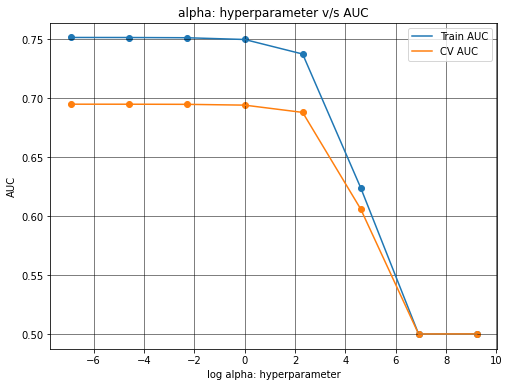

In [71]:
log_param=[]
import math as m 
for i in alpha_val['alpha']:  # converting alpha into log- alpha
    log_param.append(m.log(i))
    
train_auc = results['mean_train_score'].values
cv_auc = results['mean_test_score'].values

plt.figure(figsize=(8,6))
plt.grid()
plt.plot(log_param, train_auc, label='Train AUC')
plt.plot(log_param, cv_auc, label='CV AUC')  
plt.scatter(log_param,train_auc)
plt.scatter(log_param,cv_auc)
plt.legend()
plt.xlabel("log alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)

**Best value of hyperparameter is 0.001**

In [72]:
model = MultinomialNB(alpha=0.001, class_prior=[0.5,0.5])

In [73]:
model.fit(bow_set_feature_train, y_train)


MultinomialNB(alpha=0.001, class_prior=[0.5, 0.5])

In [74]:
y_proba_test = model.predict_proba(bow_set_feature_test)[:,1]
y_proba_test

array([0.01342202, 0.8144054 , 0.98510311, ..., 0.99999999, 0.19439374,
       0.46250087])

In [75]:
y_proba_train = model.predict_proba(bow_set_feature_train)[:,1]
y_proba_train

array([0.23031447, 0.96623703, 0.07250102, ..., 0.00402872, 0.86036437,
       1.        ])

In [76]:
auc_score = roc_auc_score(y_true=y_test, y_score=y_proba_test)
auc_score

0.6944905939886288

In [77]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [78]:
train_fpr, train_tpr, tr_threshold = roc_curve(y_train, y_proba_train)
test_fpr, test_tpr, te_threshold = roc_curve(y_test, y_proba_test)

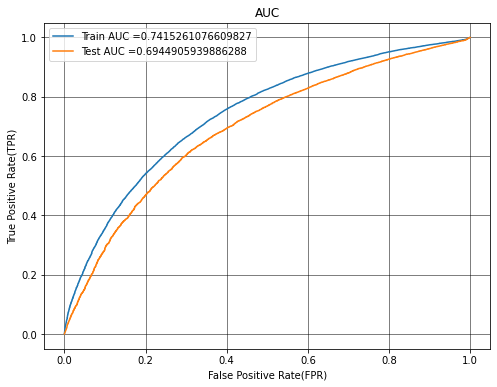

In [79]:
plt.figure(figsize=(8,6))
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(color='black',lw=0.5)

# finding best threshold

In [80]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    return t

In [81]:
best_t = find_best_threshold(tr_threshold, train_fpr, train_tpr)
best_t

0.42624679305791063

In [82]:
def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [83]:
y_train_pred = predict_with_best_t(y_proba_train, best_t)

In [84]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [85]:
cm = confusion_matrix(y_pred=y_train_pred, y_true = y_train)

# cm = cm/cm.astype(np.float).sum(axis=0)
cm            
                      

array([[ 7476,  3607],
       [19242, 42871]], dtype=int64)

<AxesSubplot:title={'center':'Confusion matrix of train data'}>

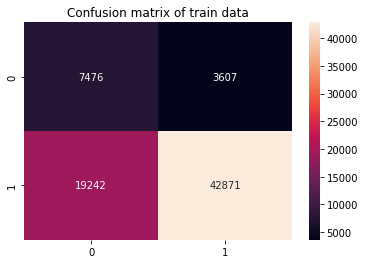

In [86]:
plt.title('Confusion matrix of train data')
sns.heatmap(cm, annot=True, fmt='d')

In [87]:
y_test_pred = predict_with_best_t(y_proba_test, best_t)

In [88]:
cm_test = confusion_matrix(y_pred=y_test_pred, y_true = y_test)
cm_test

array([[ 3369,  2090],
       [ 9785, 20808]], dtype=int64)

<AxesSubplot:title={'center':'Confusion matrix of test data'}>

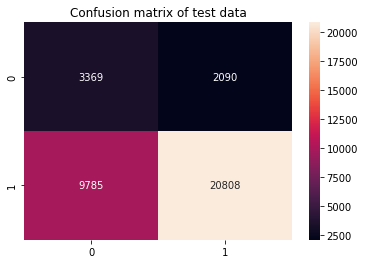

In [89]:
plt.title('Confusion matrix of test data')
sns.heatmap(cm_test, annot=True, fmt='d')

15099

# model Building (tf-idf)--- Hyperparameter tunning using GridSearchCV

In [97]:
tf_model = MultinomialNB(class_prior=[0.5,0.5])

In [98]:
alpha_val = {'alpha': [10**i for i in range(-3, 5)]}
alpha_val

{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

In [99]:
clf = GridSearchCV(estimator=tf_model, param_grid=alpha_val, scoring='roc_auc', return_train_score=True, verbose=True, cv=5, n_jobs=-1)

In [100]:
clf.fit(tf_idf_Set_feature_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=MultinomialNB(class_prior=[0.5, 0.5]), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
             return_train_score=True, scoring='roc_auc', verbose=True)

In [101]:
results = pd.DataFrame(clf.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.476126,0.007741,0.049667,0.004107,0.001,{'alpha': 0.001},0.674129,0.677083,0.677598,0.685670,...,0.678970,0.003892,1,0.739547,0.734325,0.739539,0.738506,0.740420,0.738467,0.002158
1,0.517616,0.058620,0.048470,0.004745,0.01,{'alpha': 0.01},0.674010,0.676934,0.677461,0.685566,...,0.678836,0.003898,2,0.739335,0.734123,0.739331,0.738233,0.740137,0.738232,0.002142
2,0.599131,0.063456,0.051062,0.006507,0.1,{'alpha': 0.1},0.672912,0.675621,0.676372,0.684715,...,0.677748,0.004006,3,0.737362,0.732225,0.737390,0.736242,0.738097,0.736263,0.002104
3,0.604336,0.054467,0.046479,0.003380,1,{'alpha': 1},0.662206,0.662778,0.665826,0.675547,...,0.667088,0.004890,4,0.719733,0.715157,0.719861,0.718766,0.720330,0.718769,0.001877
4,0.491005,0.039108,0.051862,0.008051,10,{'alpha': 10},0.595791,0.588615,0.600160,0.608907,...,0.599226,0.006794,5,0.624196,0.623606,0.622776,0.620541,0.622503,0.622725,0.001246
5,0.550129,0.022397,0.049466,0.004747,100,{'alpha': 100},0.541871,0.528687,0.547634,0.548236,...,0.542677,0.007351,6,0.547034,0.550573,0.545523,0.545051,0.545713,0.546779,0.002008
6,0.543941,0.042546,0.047472,0.004353,1000,{'alpha': 1000},0.527546,0.512499,0.536013,0.533469,...,0.528946,0.008741,8,0.530213,0.534169,0.527855,0.528554,0.528211,0.529801,0.002329
7,0.368622,0.066425,0.033512,0.012466,10000,{'alpha': 10000},0.527817,0.515493,0.538843,0.535302,...,0.531577,0.009143,7,0.532859,0.535878,0.529919,0.530830,0.529611,0.531820,0.002325


In [102]:
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [103]:
results = results[['param_alpha','mean_train_score', 'mean_test_score', 'rank_test_score']]
results

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.001,0.738467,0.678970,1
1,0.01,0.738232,0.678836,2
2,0.1,0.736263,0.677748,3
3,1,0.718769,0.667088,4
4,10,0.622725,0.599226,5
5,100,0.546779,0.542677,6
6,1000,0.529801,0.528946,8
7,10000,0.531820,0.531577,7


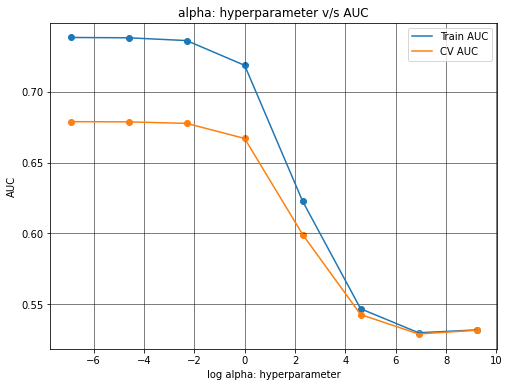

In [104]:
log_param=[]
import math as m 
for i in alpha_val['alpha']:  # converting alpha into log- alpha
    log_param.append(m.log(i))
    
train_auc = results['mean_train_score'].values
cv_auc = results['mean_test_score'].values

plt.figure(figsize=(8,6))
plt.grid()
plt.plot(log_param, train_auc, label='Train AUC')
plt.plot(log_param, cv_auc, label='CV AUC')  
plt.scatter(log_param,train_auc)
plt.scatter(log_param,cv_auc)
plt.legend()
plt.xlabel("log alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)

# model building with alpha value 0.001

In [105]:
tf_ = MultinomialNB(alpha=0.001, class_prior=[0.5,0.5])

In [106]:
tf_model.fit(tf_idf_Set_feature_train, y_train)


MultinomialNB(class_prior=[0.5, 0.5])

In [107]:
# finding the probalbilty score on test dataset
y_proba_test = tf_model.predict_proba(tf_idf_set_feature_test)[:,1]
y_proba_test

array([0.50724369, 0.62376748, 0.45853021, ..., 0.78378557, 0.55700069,
       0.54097432])

In [108]:
# finding the probalbilty score on train dataset
y_proba_train = tf_model.predict_proba(tf_idf_Set_feature_train)[:,1]
y_proba_train

array([0.35756637, 0.69519191, 0.41418842, ..., 0.43854992, 0.51883869,
       0.87408318])

In [109]:
# finding auc score on test dataset
auc_score = roc_auc_score(y_true=y_test, y_score=y_proba_test)
auc_score

0.6682005906727835

# plotting roc curve 

In [110]:
train_fpr, train_tpr, tr_threshold = roc_curve(y_train, y_proba_train)
test_fpr, test_tpr, te_threshold = roc_curve(y_test, y_proba_test)

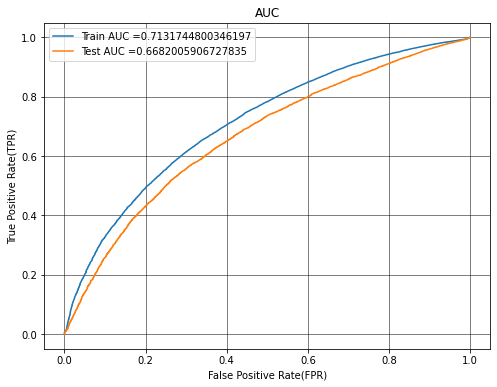

In [111]:
plt.figure(figsize=(8,6))
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(color='black',lw=0.5)

# finding best threshold

In [112]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    return t

In [113]:
best_t = find_best_threshold(tr_threshold, train_fpr, train_tpr)

best_t

0.5153995120030364

In [114]:
def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [115]:
y_train_pred = predict_with_best_t(y_proba_train, best_t)
y_train_pred[:5]

[0, 1, 0, 1, 1]

In [116]:
cm = confusion_matrix(y_pred=y_train_pred, y_true = y_train)

# cm = cm/cm.astype(np.float).sum(axis=0)
cm 

array([[ 7370,  3713],
       [21744, 40369]], dtype=int64)

<AxesSubplot:>

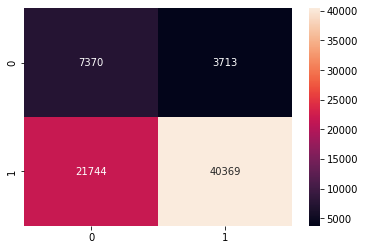

In [117]:
plt.plot('Confusion matrix on train dataset (tf-idf features)')

sns.heatmap(cm, annot=True, fmt='d')

In [118]:
y_test_pred = predict_with_best_t(y_proba_test, best_t)
y_test_pred[:5]

[0, 1, 0, 1, 0]

In [119]:
cm_test = confusion_matrix(y_pred=y_test_pred, y_true = y_test)
cm_test

array([[ 3300,  2159],
       [10846, 19747]], dtype=int64)

<AxesSubplot:>

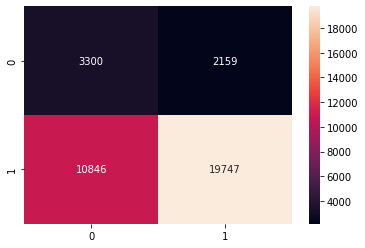

In [120]:
plt.plot('Confusion matrix on test data (tf-idf features)')

sns.heatmap(cm_test, annot=True, fmt='d')

# printing best features for class 0

In [91]:
for i in np.argsort((model.feature_log_prob_)[0])[:20]:
    print(features_bow[i])

toon
the yoga
this carpet
tables students
x0_dr
the bouncy
these headphones
dry erase board
hokki stools allow
cube
stools allow students
this rug
stools provide
the hokki stools
the hokki
wobble chairs allow
ozobot
kidney table
erase board
camera allow


# printing best features of class 1

In [96]:
for i in np.argsort(model.feature_log_prob_[1])[:20]:
    print(features_bow[i])

x0_dr
visual hands
benefits flexible
these supplies allow
giving students choice
better health
my students need materials
these materials give
our scholars
beds
need equipment
increased motivation
core strength overall
abstract concepts
feel success early
supplies provide
feel success early age


<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

In [ ]:
#Summarize your assignment work here in a few points, and also compare the final models (from set 1 and set 2), in terms of optimal hyperparameter value 'alpha', training AUC and test AUC scores.
# You can either use a pretty table or any other tabular structure.
# Reference Link for Pretty table:  https://pypi.org/project/prettytable/

In [126]:
from prettytable import PrettyTable
table=PrettyTable()
table.field_names = ["Vectorizer", "Model", "Hyper Parameter", "Train-AUC","Test-AUC"]
table.add_row(["BOW", "Naive Bayes", 10**-3,0.7415, 0.6944])
table.add_row(["TFIDF", "Naive Bayes", 10**-3,0.7131, 0.66])
print(table)

+------------+-------------+-----------------+-----------+----------+
| Vectorizer |    Model    | Hyper Parameter | Train-AUC | Test-AUC |
+------------+-------------+-----------------+-----------+----------+
|    BOW     | Naive Bayes |      0.001      |   0.7415  |  0.6944  |
|   TFIDF    | Naive Bayes |      0.001      |   0.7131  |   0.66   |
+------------+-------------+-----------------+-----------+----------+


In [ ]:
# Most imp thing I learned that if i Dont use max features than my model was going crazy. 